[3.93948998e-90 3.93948998e-90 3.93948998e-90 ... 1.68751108e+07
 1.66759318e+07 1.64767661e+07]
1.2912654519457745e-10 7.4316102215908316e-09
4.999999999998766e-08 5.0000000000001215e-08


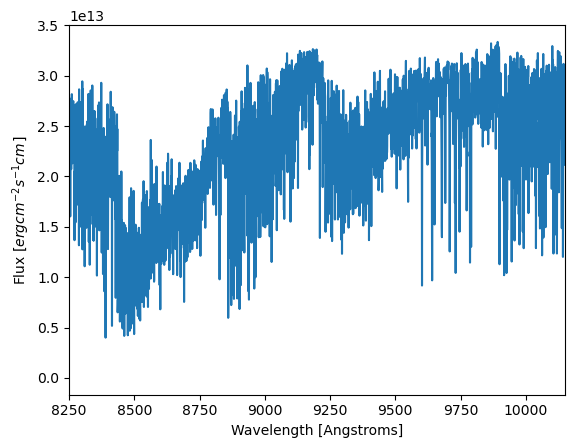

In [1]:
import numpy as np
import scipy.stats as sps
from scipy.interpolate import CubicSpline, LinearNDInterpolator, interp1d

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import qp
from Functions.convert_file import *
from Functions.f_nu_models import *

# these things don't change the value because they get cancelled for color (only depends on SED which depends on temperature)
R = (0.185*u.Rsun).cgs.value
d = (10*u.pc).cgs.value
# F_0 in AB system, which is constant
F_0 = (3631.00*u.Jy).cgs.value
radial_dist = get_radial_distribution()

# Read in Z, Y, r, and i passband files
wavelengths_z, transmission_z = ascii_to_array('CTIO/CTIO_DECam.z.txt')
wavelengths_Y, transmission_Y = ascii_to_array('CTIO/CTIO_DECam.Y.txt')
wavelengths_i, transmission_i = ascii_to_array('CTIO/CTIO_DECam.i.txt')
wavelengths_r, transmission_r = ascii_to_array('CTIO/CTIO_DECam.r.txt')

f_nu_table = fits_to_spline('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/phoenix/phoenixm00/phoenixm00_2800.fits', 'g50')

f_nu_z = passband_flux(f_nu_table(wavelengths_z.cgs.value), transmission_z, wavelengths_z)
f_nu_Y = passband_flux(f_nu_table(wavelengths_Y.cgs.value), transmission_Y, wavelengths_Y)
f_nu_i = passband_flux(f_nu_table(wavelengths_i.cgs.value), transmission_i, wavelengths_i)
f_nu_r = passband_flux(f_nu_table(wavelengths_r.cgs.value), transmission_r, wavelengths_r)

m_z = get_and_compare_mag(f_nu_z, R, d, F_0)
m_Y = get_and_compare_mag(f_nu_Y, R, d, F_0)
m_i = get_and_compare_mag(f_nu_i, R, d, F_0)
m_r = get_and_compare_mag(f_nu_r, R, d, F_0)


x_actual, y_actual = fits_to_wav_flux('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/phoenix/phoenixm00/phoenixm00_2800.fits', 'g50')
print(y_actual)
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Flux [$erg cm^{-2}s^{-1}cm^{}$]")
# convert to 
plt.xlim(8.25e3, 0.0001015*1e8)
plt.plot(x_actual*1e8, y_actual)
# 
wavelengths_z = wavelengths_z.cgs.value
print(np.min(np.diff(x_actual)), np.max(np.diff(x_actual[  (x_actual > wavelengths_z.min()) & (x_actual < wavelengths_z.max()) ])))
print(np.min(np.diff(wavelengths_z)), np.max(np.diff(wavelengths_z)))


In [2]:
# With InterpolatedUnivariateSpline
x_z = wavelengths_z.cgs.value
y_z = f_nu_table(wavelengths_z.cgs.value)
plt.xlabel("Wavelength for z-band [cm]")
plt.ylabel("Flux [$erg cm^{-2}s^{-1}cm^{}$]")
plt.plot(x_z, y_z)

AttributeError: 'numpy.ndarray' object has no attribute 'cgs'

In [ ]:
f_cubic = fits_to_cubic_spline('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/phoenix/phoenixm00/phoenixm00_2800.fits', 'g50')
y_cubic = f_cubic(wavelengths_z.cgs.value)
plt.xlabel("Wavelength for z-band [cm]")
plt.ylabel("Flux [$erg cm^{-2}s^{-1}cm^{}$]")
plt.plot(wavelengths_z.cgs.value, y_cubic, label='Cubic')
plt.plot(x_z, y_z, color='red', label='InterpolatedUnivariateSpline')
plt.legend()


In [ ]:
f_akima = fits_to_akima_spline('https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/phoenix/phoenixm00/phoenixm00_2800.fits', 'g50')
y_akima = f_akima(wavelengths_z.cgs.value)
plt.xlabel("Wavelength for z-band [cm]")
plt.ylabel("Flux [$erg cm^{-2}s^{-1}cm^{}$]")
plt.plot(wavelengths_z.cgs.value, y_akima, label='Akima')
plt.legend()

In [ ]:
ynew = np.interp(x_z, x_z, y_z)
plt.xlabel("Wavelength for z-band [cm]")
plt.ylabel("Flux [$erg cm^{-2}s^{-1}cm^{}$]")
plt.plot(wavelengths_z.cgs.value, ynew, label='Linear')
plt.plot(wavelengths_z.cgs.value, y_akima, label='Akima',color='green')

plt.legend()